In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels
from statsmodels.tsa.stattools import coint

import yfinance as yf

Duplicate key in file '/Users/nontawatpattanajak/.matplotlib/matplotlibrc' line #4.


# 1. Download and Visualise Stock Data

In [2]:
#Ticker Name of Thai Bank
symbol = ['BAY','BBL','CIMBT','KBANK','KKP','KTB','LHFG','SCB','TCAP','TISCO','TMB']
symbol_bkk = []
for i in symbol:
    symbol_bkk.append(i + '.BK')

In [3]:
#download dataset
ohlcv_data = {}
for ticker in symbol_bkk:
    ohlcv_data[ticker] = yf.download(ticker,period='1y', interval="1d")
    
#interval: 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo
#Valid periods are: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
ohlcv_data['SCB.BK']

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-08-28,121.00,122.50,120.50,120.50,113.358917,4665600
2019-08-29,121.00,123.00,120.00,122.00,114.770027,6084400
2019-08-30,123.00,124.50,122.50,123.50,116.181129,8798200
2019-09-02,123.50,124.00,122.00,122.00,114.770027,6195500
2019-09-03,122.00,122.50,118.50,119.00,111.947807,14009900
...,...,...,...,...,...,...
2020-08-24,71.25,71.50,69.25,70.50,70.500000,10328900
2020-08-25,71.50,72.75,70.75,71.25,71.250000,9542700
2020-08-26,71.25,72.25,70.75,72.00,72.000000,6857000


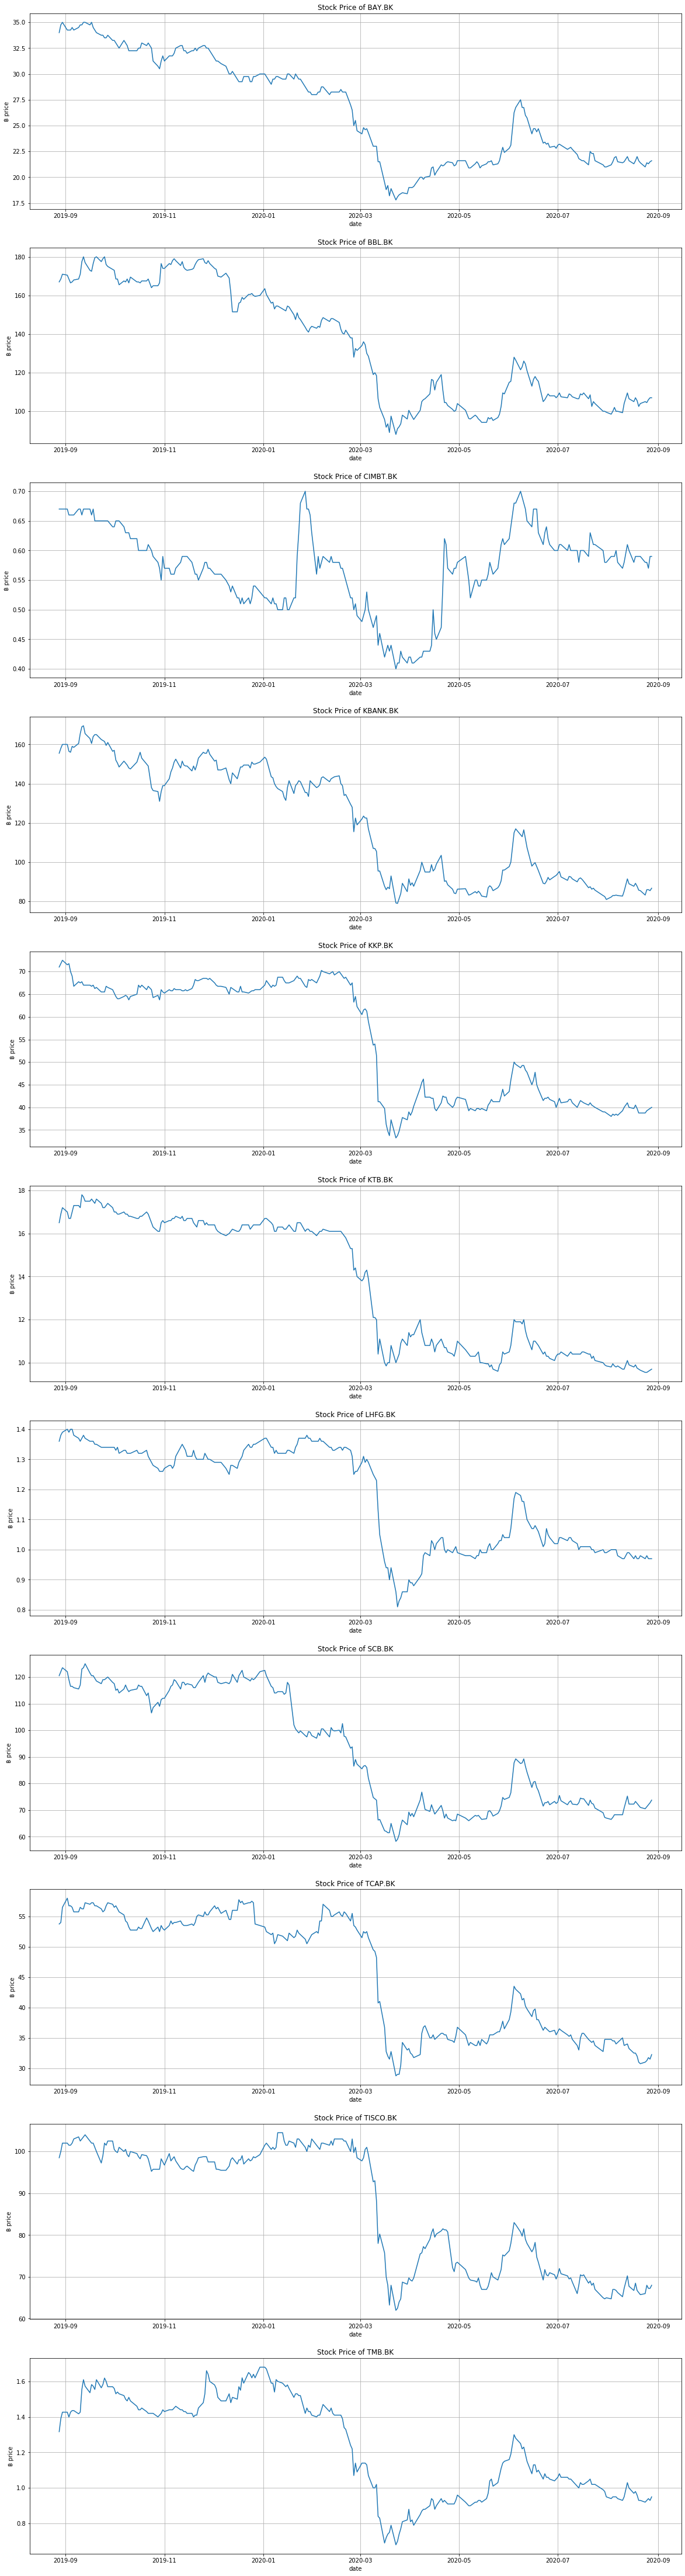

In [5]:
plt.figure(figsize=(20,80))

for i, ticker in enumerate(symbol_bkk):
    plt.subplot(len(symbol_bkk), 1, i+1)
    plt.plot(ohlcv_data[ticker]['Close'])
    plt.xlabel("date")
    plt.ylabel("฿ price")
    plt.grid(True)
    plt.title("Stock Price of " + ticker)

# 2. Find Pair Securities of Trading by Cointegration

In [6]:
security_1 = ohlcv_data['SCB.BK']['Close']
security_2 = ohlcv_data['KBANK.BK']['Close']

if security_1.shape[0] <= security_2.shape[0]:
    filter_length = security_1.shape[0]
else:
    filter_length = security_2.shape[0]

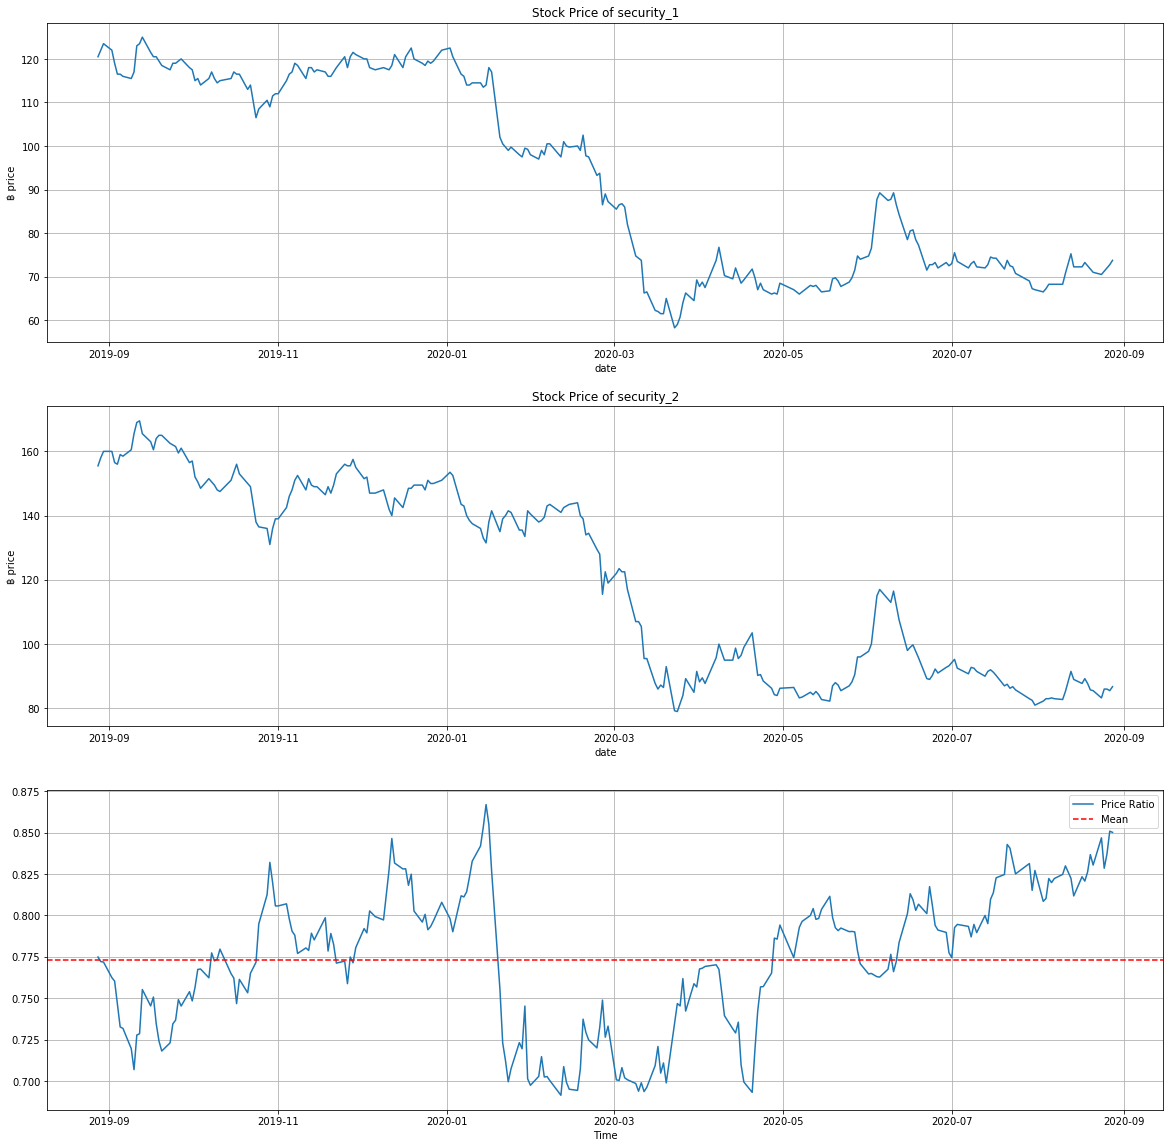

In [7]:


plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.plot(security_1)
plt.xlabel("date")
plt.ylabel("฿ price")
plt.grid(True)
plt.title("Stock Price of security_1")

plt.subplot(3, 1, 2)
plt.plot(security_2)
plt.xlabel("date")
plt.ylabel("฿ price")
plt.grid(True)
plt.title("Stock Price of security_2")

plt.subplot(3, 1, 3)
plt.plot(security_1/security_2)
plt.axhline((security_1/security_2).mean(), color='red', linestyle='--') 
plt.xlabel('Time')
plt.legend(['Price Ratio', 'Mean'])
plt.grid(True)

In [8]:
score, pvalue, _ = coint(security_2[:filter_length],security_1[:filter_length]) #[:filter_length] is to make data having the same size

In [9]:
print('score: {} \npvalue: {}'.format(score, pvalue))

score: -3.103945918039153 
pvalue: 0.08751302594954868


In [10]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            S1 = data[keys[i]]
            S2 = data[keys[j]]
            result = coint(S1, S2)
            score = result[0]
            pvalue = result[1]
            score_matrix[i, j] = score
            pvalue_matrix[i, j] = pvalue
            if pvalue < 0.05:
                pairs.append((keys[i], keys[j]))
    return score_matrix, pvalue_matrix, pairs

In [11]:
#to find max data length
longest_timestamp = 0
security_name = str()
for ticker in symbol_bkk:
    if ohlcv_data[ticker].shape[0] > longest_timestamp:
        longest_timestamp = ohlcv_data[ticker].shape[0]
        security_name = ticker
print('longest_timestamp: ', longest_timestamp)
print('security_name: ', security_name)

longest_timestamp:  247
security_name:  BAY.BK


In [12]:
data = pd.DataFrame(ohlcv_data[security_name]['Close'])
data.rename(columns = {'Close' : security_name}, inplace = True)

In [13]:
for ticker_name in symbol_bkk:
    if ticker_name != security_name:
        data[ticker_name] = ohlcv_data[ticker_name]['Close']

In [14]:
data

,BAY.BK,BBL.BK,CIMBT.BK,KBANK.BK,KKP.BK,KTB.BK,LHFG.BK,SCB.BK,TCAP.BK,TISCO.BK,TMB.BK
Date,,,,,,,,,,,
2019-08-28,34.000000,167.0,0.67,155.50,71.00,16.500000,1.36,120.50,53.75,98.50,1.31686
2019-08-29,34.750000,168.5,0.67,158.00,71.75,16.900000,1.38,122.00,54.00,100.00,1.39002
2019-08-30,35.000000,171.0,0.67,160.00,72.50,17.200001,1.39,123.50,56.50,102.00,1.42660
2019-09-02,34.250000,170.5,0.67,160.00,71.50,17.000000,1.40,122.00,58.00,102.00,1.42660
2019-09-03,34.250000,168.5,0.66,156.50,71.75,16.700001,1.39,119.00,56.75,101.50,1.39917
...,...,...,...,...,...,...,...,...,...,...,...
2020-08-24,21.000000,105.0,0.58,83.25,38.75,9.550000,0.97,70.50,31.00,66.00,0.92000
2020-08-25,21.400000,104.5,0.58,86.00,39.25,9.550000,0.98,71.25,31.25,68.00,0.93000
2020-08-26,21.299999,106.0,0.57,86.00,39.50,9.600000,0.97,72.00,31.75,67.25,0.94000


In [15]:
#replace NULL data with previous bvalue
data.fillna(method ='ffill', inplace = True)

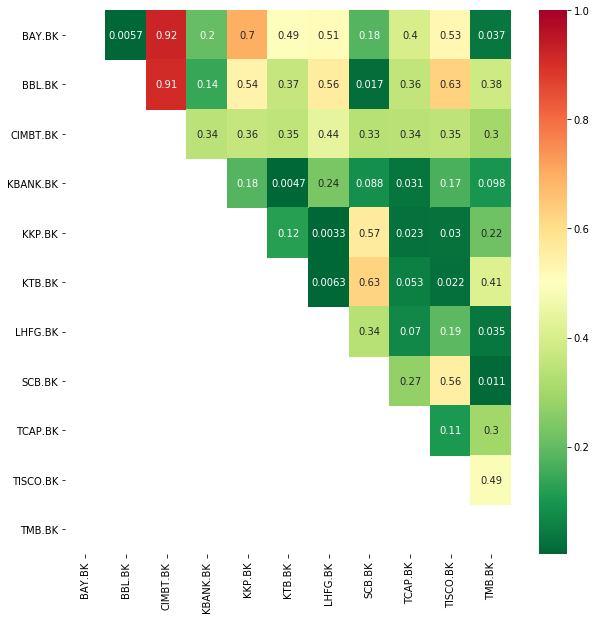

[('BAY.BK', 'BBL.BK'), ('BAY.BK', 'TMB.BK'), ('BBL.BK', 'SCB.BK'), ('KBANK.BK', 'KTB.BK'), ('KBANK.BK', 'TCAP.BK'), ('KKP.BK', 'LHFG.BK'), ('KKP.BK', 'TCAP.BK'), ('KKP.BK', 'TISCO.BK'), ('KTB.BK', 'LHFG.BK'), ('KTB.BK', 'TISCO.BK'), ('LHFG.BK', 'TMB.BK'), ('SCB.BK', 'TMB.BK')]


In [16]:
scores, pvalues, pairs = find_cointegrated_pairs(data)
plt.figure(figsize=(10,10))
import seaborn
seaborn.heatmap(pvalues, 
                xticklabels=symbol_bkk, 
                yticklabels=symbol_bkk, 
                cmap='RdYlGn_r', 
                mask = (pvalues >= 0.98),
                annot=True,
               )
plt.show()
print(pairs)

# 3. Figture out when to sell and buy from an exmaple pair securities

0.4366936701332158


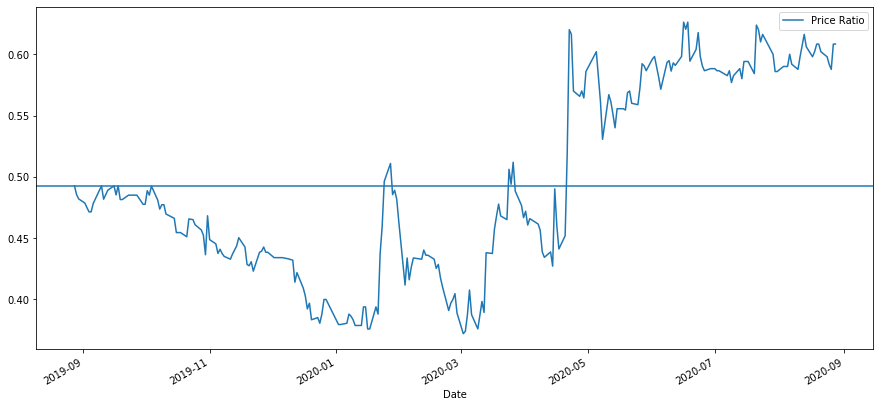

In [17]:
S1_name = 'CIMBT.BK'
S2_name = 'LHFG.BK'

S1 = data[S1_name]
S2 = data[S2_name]

score, pvalue, _ = coint(S1, S2)
print(pvalue)
ratios = S1 / S2
ratios.plot(figsize=(15,7))
plt.axhline(ratios.mean())
plt.legend(['Price Ratio'])
plt.show()

In [18]:
def zscore(series):
    return (series - series.mean()) / np.std(series)

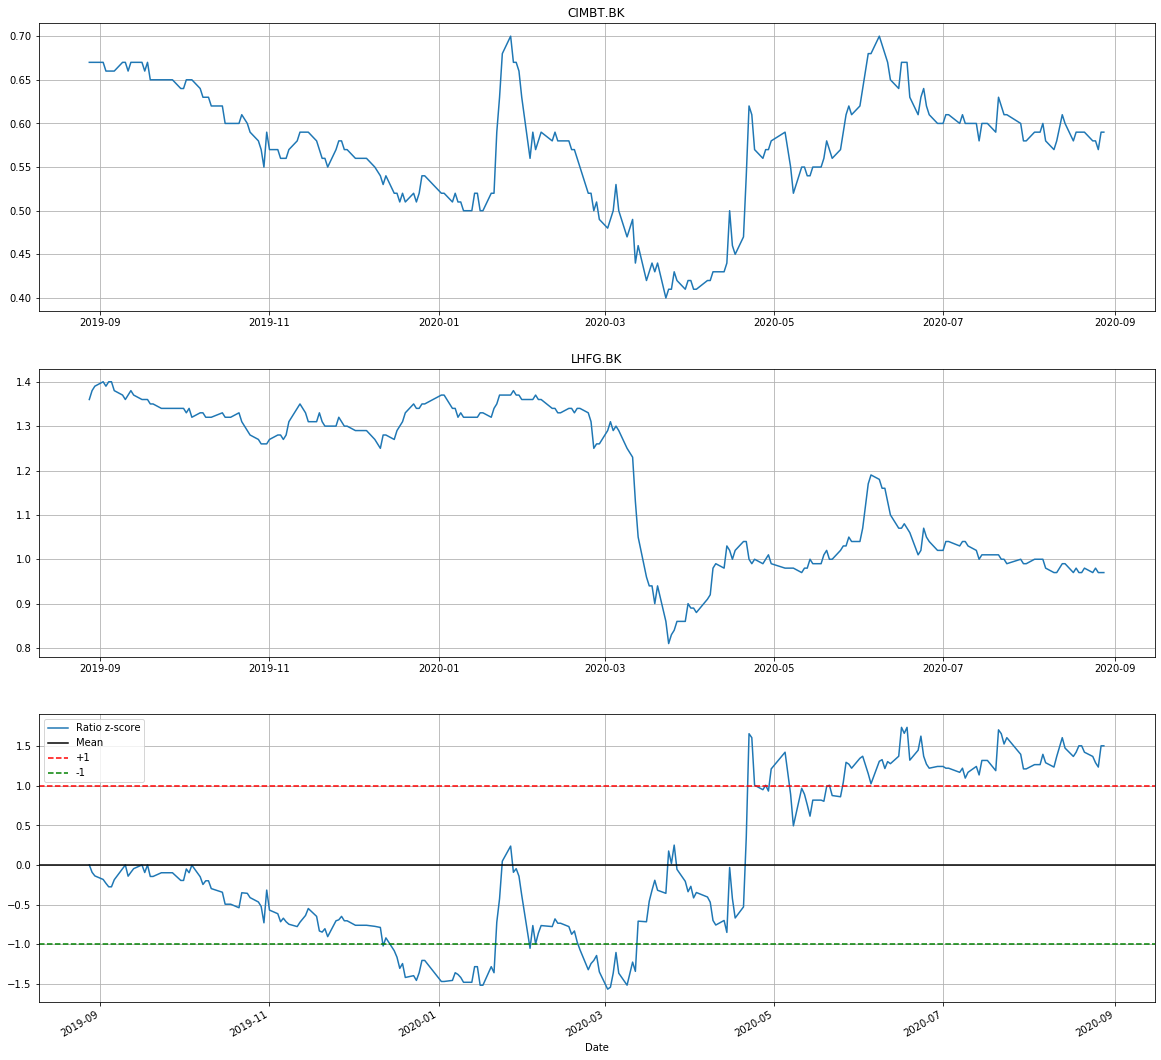

In [19]:
plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.plot(S1)
plt.title(S1_name)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(S2)
plt.title(S2_name)
plt.grid(True)

plt.subplot(3, 1, 3)

zscore(ratios).plot()
plt.axhline(zscore(ratios).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Ratio z-score', 'Mean', '+1', '-1'])
plt.grid(True)

plt.show()

# 4. Separate train and test data for rolling average

In [20]:
#train:test 70:30
ratios = S1 / S2
print(len(ratios))

split_number = int(len(ratios)*0.7)

train = ratios[:split_number]
test = ratios[split_number:]

247


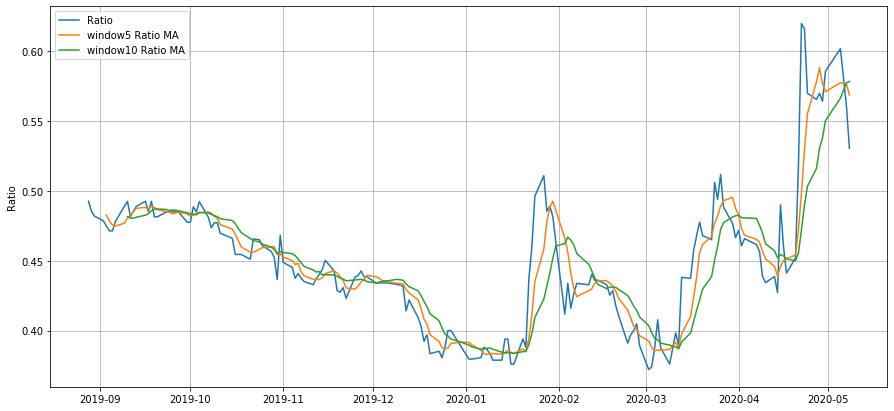

In [21]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()

ratios_mavg10 = train.rolling(window=10, center=False).mean()

std_10 = train.rolling(window=10, center=False).std()

zscore_10_5 = (ratios_mavg5 - ratios_mavg10)/std_10
plt.figure(figsize=(15,7))
plt.plot(train)
plt.plot(ratios_mavg5)
plt.plot(ratios_mavg10)

plt.legend(['Ratio','window5 Ratio MA', 'window10 Ratio MA'])
plt.ylabel('Ratio')
plt.grid(True)

plt.show()

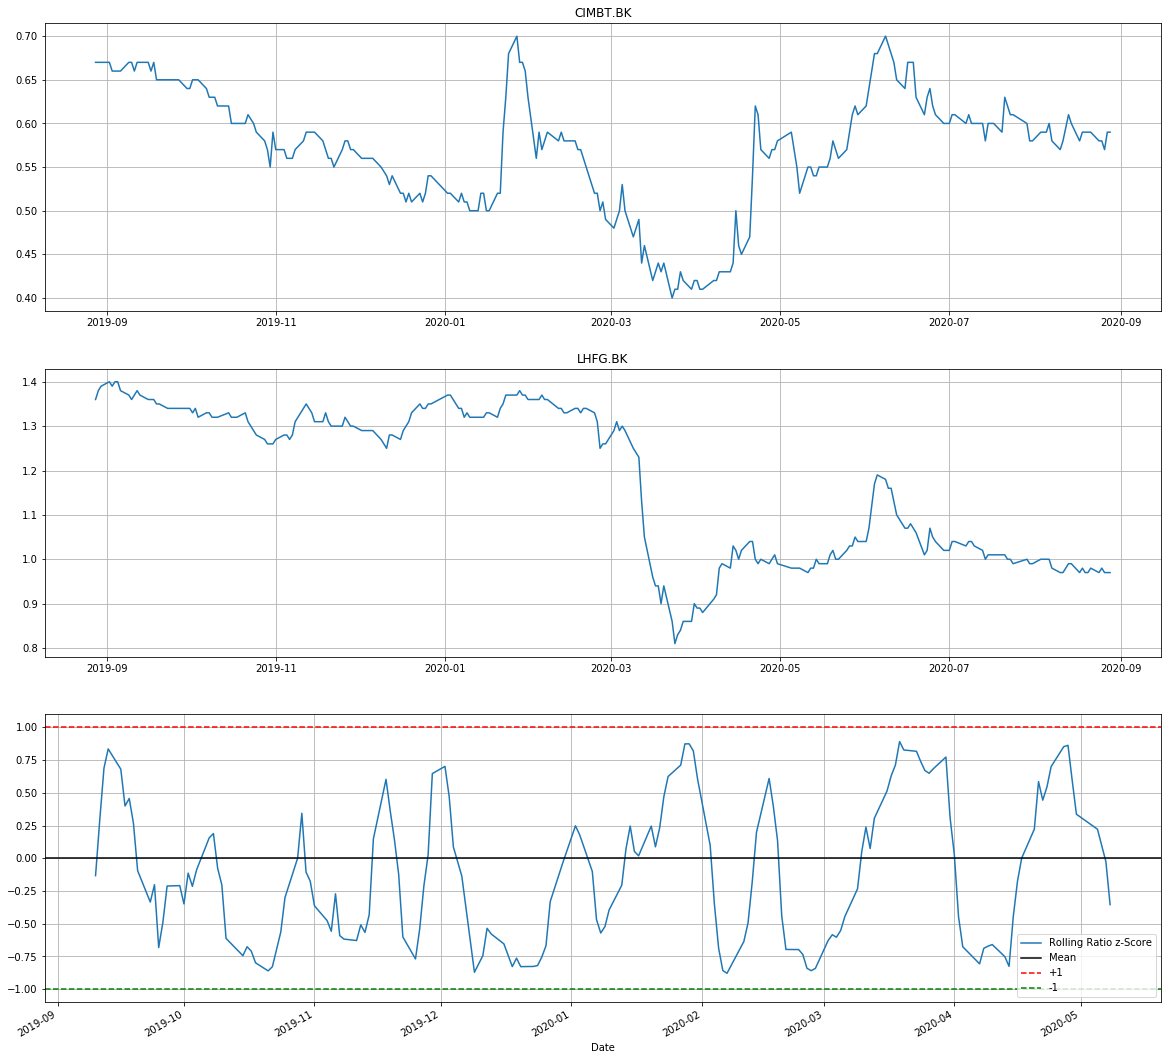

In [22]:
# Take a rolling 60 day standard deviation
std_10 = train.rolling(window=10,center=False).std()
std_10.name = 'std window10'

# Compute the z score for each day
zscore_10_5 = (ratios_mavg5 - ratios_mavg10)/std_10
zscore_10_5.name = 'z-score'

plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.plot(S1)
plt.title(S1_name)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(S2)
plt.title(S2_name)
plt.grid(True)

plt.subplot(3, 1, 3)



zscore_10_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.grid(True)
plt.show()

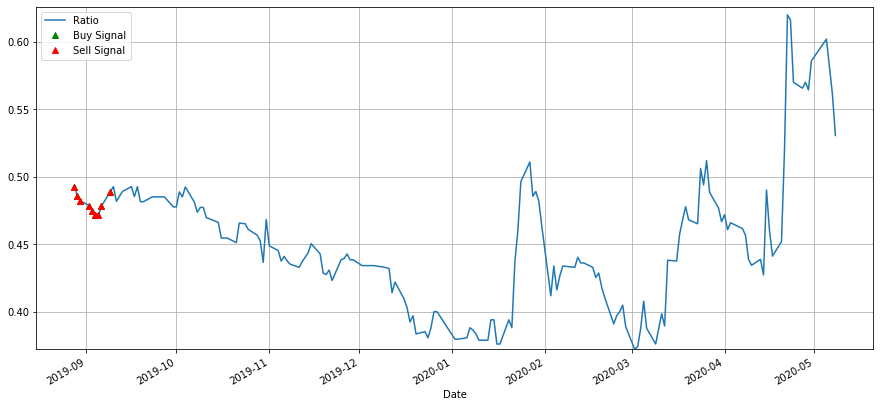

In [23]:
# Plot the ratios and buy and sell signals from z score
plt.figure(figsize=(15,7))

train.plot()
buy = train.copy()
sell = train.copy()
buy[zscore_10_5>-1] = 0
sell[zscore_10_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,ratios.min(),ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.grid(True)
plt.show()

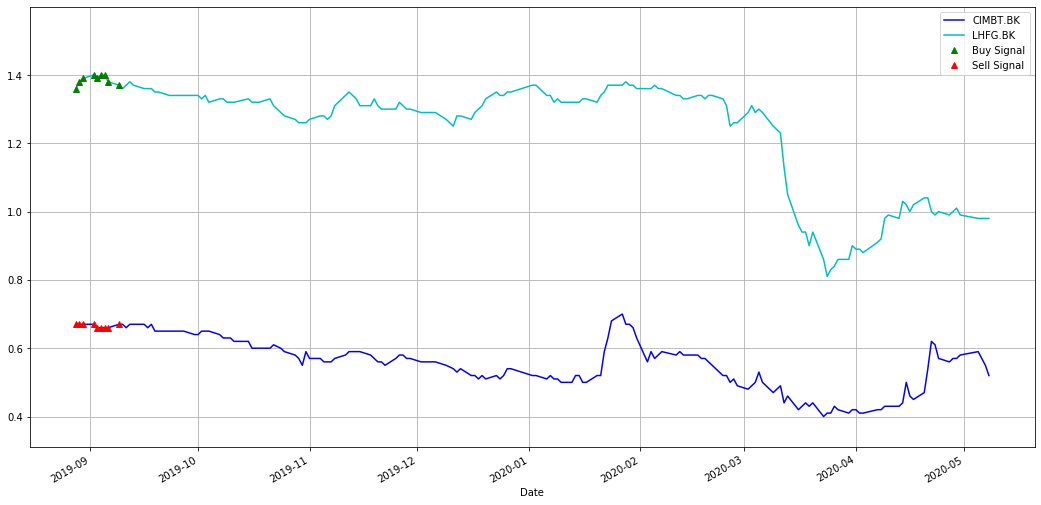

In [24]:
# Plot the prices and buy and sell signals from z score
plt.figure(figsize=(18,9))
S1 = data[S1_name].iloc[:split_number]
S2 = data[S2_name].iloc[:split_number]

S1.plot(color='b')
S2.plot(color='c')
buyR = 0*S1.copy()
sellR = 0*S1.copy()

# When buying the ratio, buy S1 and sell S2
buyR[buy!=0] = S1[buy!=0]
sellR[buy!=0] = S2[buy!=0]
# When selling the ratio, sell S1 and buy S2 
buyR[sell!=0] = S2[sell!=0]
sellR[sell!=0] = S1[sell!=0]

buyR.plot(color='g', linestyle='None', marker='^')
sellR.plot(color='r', linestyle='None', marker='^')
x1,x2,y1,y2 = plt.axis()
plt.axis((x1,x2,min(S1.min(),S2.min()-0.5),max(S1.max(),S2.max())+0.2))

plt.legend([S1_name, S2_name, 'Buy Signal', 'Sell Signal'])
plt.grid(True)
plt.show()

# 5. To figture out what is the best size for windowing

In [25]:
def trade(S1, S2, window1, window2):
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1, center=False).mean()
    ma2 = ratios.rolling(window=window2, center=False).mean()
    std = ratios.rolling(window=window2, center=False).std()
    zscore = (ma1 - ma2)/std
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] > 1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
        # Buy long if the z-score is < 1
        elif zscore[i] < -1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.5:
            money += countS1*S1[i] + S2[i] * countS2
            countS1 = 0
            countS2 = 0
#         print('Z-score: '+ str(zscore[i]), countS1, countS2, S1[i] , S2[i])
    return money


trade(data[S1_name].iloc[:split_number], data[S2_name].iloc[:split_number], 5, 10)

0.0

In [26]:
trade(data[S1_name].iloc[split_number:], data[S2_name].iloc[split_number:], 5, 10)

0.0

In [27]:
# Find the window length 0-254 
# that gives the highest returns using this strategy
length_scores = [trade(data[S1_name].iloc[:split_number], 
                data[S2_name].iloc[:split_number], 5, l) 
                for l in range(100)]
best_length = np.argmax(length_scores)
print ('Best window length:', best_length)

Best window length: 74


In [28]:
# Find the returns for test data
# using what we think is the best window length
length_scores2 = [trade(data[S1_name].iloc[split_number:], 
                  data[S2_name].iloc[split_number:],5, l) 
                  for l in range(100)]
print (best_length, 'window:', length_scores2[best_length])

# Find the best window length based on this dataset, 
# and the returns using this window length
best_length2 = np.argmax(length_scores2)
print (best_length2, 'window:', length_scores2[best_length2])

74 window: 0.0
26 window: 0.220199918329272


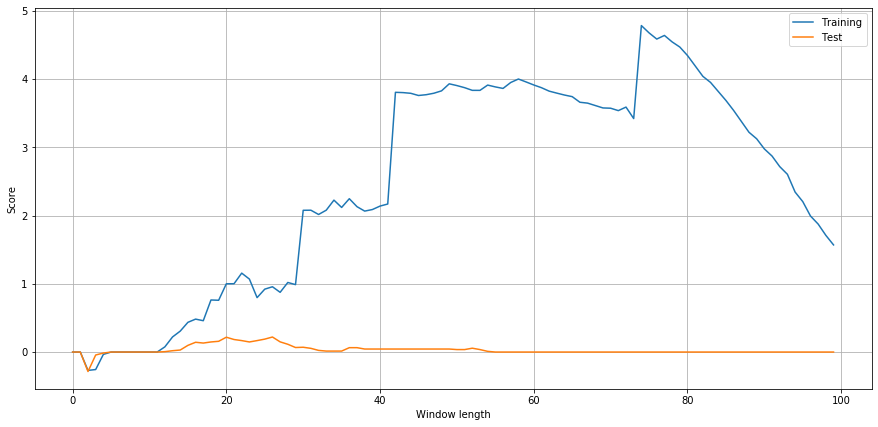

In [29]:
plt.figure(figsize=(15,7))
plt.plot(length_scores)
plt.plot(length_scores2)
plt.xlabel('Window length')
plt.ylabel('Score')
plt.legend(['Training', 'Test'])
plt.grid(True)
plt.show()

# Discussion